In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ejercicio 1
carga todos los archivos que empieza por "data_" y juntalos en un solo DataFrame de pandas. 

IMPORTANTE: es obligatorio el uso de `for` en este ejercicio. NO PUEDES CARGAR TODOS LOS DATAFRAMES EN LINEAS SEPARADAS Y JUNTARLOS DESPUES

In [2]:
codigos = ['AFG', 'SOM', 'NGA', 'NER', 'MOZ', 'MLI', 'LBR', 'BDI', 'LAO', 'SSD','HTI', 'GNB', 'GMB', 'TCD', 'COD', 'CMR', 'CAF', 'BFA', 'SDN', 'MMR','YEM', 'SYR', 'COG', 'IRQ', 'LBN']

In [6]:
df = None

for codigo in codigos:
    nombre_archivo = f"data_{codigo}.csv"
    df_ = pd.read_csv(f"data/{nombre_archivo}")
    if df is None:
        df = df_
    else:
        df = pd.concat([df,df_])


# # Forma 2
# dataframes = []
# for codigo in codigos:
#     nombre_archivo = f"data_{codigo}.csv"
#     df_ = pd.read_csv(f"data/{nombre_archivo}")
#     dataframes.append(df_)

# df = pd.concat(dataframes)


In [8]:
df = df.reset_index(drop=True)

In [9]:
df

,Open,High,Low,Close,Inflation,country,ISO3,date
0,0.53,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-01-01
1,0.53,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-02-01
2,0.54,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-03-01
3,0.53,0.55,0.53,0.55,NaN,Afghanistan,AFG,2007-04-01
4,0.56,0.57,0.56,0.57,NaN,Afghanistan,AFG,2007-05-01
...,...,...,...,...,...,...,...,...
4793,34.54,35.03,34.06,34.93,125.45,Lebanon,LBN,2023-06-01
4794,37.60,38.06,37.13,37.67,137.39,Lebanon,LBN,2023-07-01
4795,40.42,40.84,40.01,40.43,139.28,Lebanon,LBN,2023-08-01
4796,43.41,43.79,42.87,42.87,123.83,Lebanon,LBN,2023-09-01


# Ejercicio 2

Una vez cargado, dime que dimension tiene, cuales son los valores extremos, y dime el rango existente entre la media y la mediana. 

In [10]:
df.shape

(4798, 8)

In [11]:
df.describe()

,Open,High,Low,Close,Inflation
count,4734.000000,4734.000000,4734.000000,4734.000000,4434.000000
mean,1.491880,1.536158,1.451056,1.492398,14.692346
std,4.652457,4.883312,4.439229,4.633321,35.910342
min,0.010000,0.010000,0.010000,0.010000,-31.470000
25%,0.740000,0.750000,0.720000,0.740000,-0.487500
50%,0.960000,0.980000,0.950000,0.960000,5.360000
75%,1.100000,1.120000,1.077500,1.100000,16.372500
max,102.460000,106.480000,94.420000,94.420000,363.100000


# Ejercicio 3

Pinta en una gráfica todos los valores del campo `Close` del dataframe, haciendo distición entre el pais (Separados en diferentes líneas correctamente especificadas en una leyenda).  
Puedes usar matplotlib, seaborn o plotly. 

In [14]:
import seaborn as sns

<AxesSubplot: xlabel='date', ylabel='Close'>

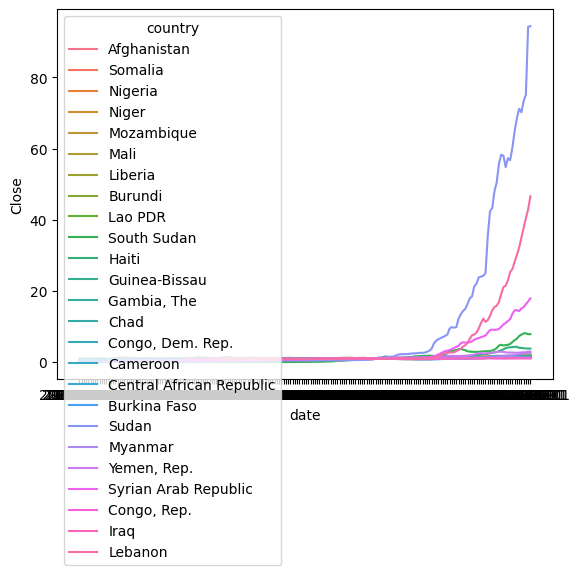

In [17]:
sns.lineplot(data=df,x='date',y='Close',hue="country")

In [18]:
df.country.unique()

array(['Afghanistan', 'Somalia', 'Nigeria', 'Niger', 'Mozambique', 'Mali',
       'Liberia', 'Burundi', 'Lao PDR', 'South Sudan', 'Haiti',
       'Guinea-Bissau', 'Gambia, The', 'Chad', 'Congo, Dem. Rep.',
       'Cameroon', 'Central African Republic', 'Burkina Faso', 'Sudan',
       'Myanmar', 'Yemen, Rep.', 'Syrian Arab Republic', 'Congo, Rep.',
       'Iraq', 'Lebanon'], dtype=object)

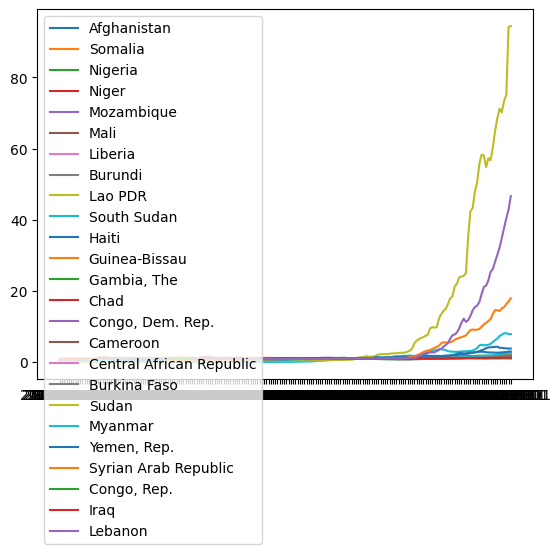

In [24]:
plt.Figure()
for pais in df.country.unique():
    df_ = df[df.country == pais]
    plt.plot(df_.date,df_.Close,label=pais)

plt.legend()

# Ejercicio 4

Agrupa el dataframe por pais, y selecciona los valores medios de las columnas nuevas.

Guarda este dataframe en una variable y llamala como quieras

In [26]:

df2 = df.groupby('country').mean()

/tmp/ipykernel_3231/2906949082.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df.groupby('country').mean()


In [31]:
df2

,Open,High,Low,Close,Inflation
country,,,,,
Afghanistan,0.993069,1.004257,0.982772,0.993020,7.585579
Burkina Faso,0.925941,0.952376,0.901238,0.926584,8.713789
Burundi,0.901980,0.926040,0.878663,0.902475,8.850684
Cameroon,1.014233,1.018037,1.009816,1.014233,2.789272
Central African Republic,0.922327,0.954455,0.893168,0.926337,6.324526
Chad,1.049455,1.078416,1.019950,1.048366,4.592000
"Congo, Dem. Rep.",0.932376,0.948267,0.916782,0.931881,7.071737
"Congo, Rep.",0.942922,0.956364,0.930130,0.943961,1.503239
"Gambia, The",0.878317,0.889257,0.867574,0.879010,6.809053


# Ejercicio 5

Carga el archivo `detalles.csv` en un nuevo dataframe y mergealo (haz un join) con el dataframe anterior (el del ejercicio 4). Elije tu el campo por el que hacer el join y justifica su respuesta.

Guarda este join en un nuevo dataframe. Llamalo como quieras. 

In [27]:
df3 = pd.read_csv("data/detalles.csv")

In [32]:
df4 = pd.merge(df3,df2,on="country")

# Ejercicio 6

Querys: 

- Cual es el país que tiene el valor más alto de `number_of_markets_modeled`
- Cual es el país que tiene el valor más cercano (o exacto) a la media de `number_of_food_items`
- Cual es el valor de `Close` del valor que tiene el valor más alto de `number_of_markets_covered`, y en caso de empate, el que además tiene el valor más bajo de `number_of_food_items`

In [38]:
df3.number_of_markets_modeled.max()

228

In [39]:
df3[df3.number_of_markets_modeled == df3.number_of_markets_modeled.max()]

,country,iso3,components,currency,start_date_observations,end_date_observations,number_of_markets_modeled,number_of_markets_covered,number_of_food_items,number_of_observations_food,...,total_food_price_increase_since_start_date,average_annualized_food_inflation,maximum_food_drawdown,average_annualized_food_volatility,average_monthly_food_price_correlation_between_markets,average_annual_food_price_correlation_between_markets,Rsquared_individual_food_items,Rsquared_individual_other_items,index_confidence_score,imputation_model
15,Myanmar,MMR,"Pulses (1 KG, Index Weight = 1), Rice (Low Qua...",MMK,Jan 2008,Aug 2023,228,228,3,"pulses: 5466, rice: 7818, salt: 7126",...,402.34%,10.79%,-23.71%,9.89%,0.26,0.65,"pulses: 0.91, rice: 0.9, salt: 0.86",:,0.89,"pulses: cubist (Andree, 2021), rice: cubist (A..."


In [41]:
df3.number_of_food_items.mean()

9.32

In [44]:
df3[df3.number_of_food_items >= df3.number_of_food_items.mean() ].sort_values('number_of_food_items').head(1)

,country,iso3,components,currency,start_date_observations,end_date_observations,number_of_markets_modeled,number_of_markets_covered,number_of_food_items,number_of_observations_food,...,total_food_price_increase_since_start_date,average_annualized_food_inflation,maximum_food_drawdown,average_annualized_food_volatility,average_monthly_food_price_correlation_between_markets,average_annual_food_price_correlation_between_markets,Rsquared_individual_food_items,Rsquared_individual_other_items,index_confidence_score,imputation_model
1,Burundi,BDI,"Bananas (1 KG, Index Weight = 1), Beans (1 KG,...",BIF,Jan 2007,Aug 2023,72,72,10,"bananas: 5344, beans: 5963, cassava_flour: 594...",...,254.94%,7.86%,-30.77%,12.03%,0.6,0.83,"bananas: 0.88, beans: 0.9, cassava_flour: 0.89...",:,0.9,"bananas: two-stage cubist (Andree and Pape, 20..."


In [45]:
df4.Close.max()

8.217475247524753

In [46]:
df4[df4.Close == df4.Close.max()]

,country,iso3,components,currency,start_date_observations,end_date_observations,number_of_markets_modeled,number_of_markets_covered,number_of_food_items,number_of_observations_food,...,average_annual_food_price_correlation_between_markets,Rsquared_individual_food_items,Rsquared_individual_other_items,index_confidence_score,imputation_model,Open,High,Low,Close,Inflation
19,Sudan,SDN,"Millet (3.5 KG, Index Weight = 0.29), Sorghum ...",SDG,Jan 2007,Aug 2023,17,17,4,"millet: 2133, sorghum: 1662, sorghum_food_aid:...",...,0.95,"millet: 0.93, sorghum: 0.93, sorghum_food_aid:...",:,0.93,"millet: cubist (Andree, 2021), sorghum: cubist...",8.212772,8.671584,7.823069,8.217475,65.871632
